# Importing Libraries

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Loading the dataset

In [2]:
phone = pd.read_csv("C:\\Users\\DELL\\Association\\myphonedata.csv")
phone

,V1,V2,V3,red,white,green,yellow,orange,blue
0,red,white,green,1,1,1,0,0,0
1,white,orange,NaN,0,1,0,0,1,0
2,white,blue,NaN,0,1,0,0,0,1
3,red,white,orange,1,1,0,0,1,0
4,red,blue,NaN,1,0,0,0,0,1
5,white,blue,NaN,0,1,0,0,0,1
6,red,blue,NaN,1,0,0,0,0,1
7,red,white,blue,1,1,0,0,0,1
8,green,NaN,NaN,0,0,1,0,0,0
9,red,white,blue,1,1,0,0,0,1


# Removing the unwanted columns


In [3]:
phone.drop(phone.iloc[: , 0:3],  inplace = True, axis = 1)
phone

,red,white,green,yellow,orange,blue
0,1,1,1,0,0,0
1,0,1,0,0,1,0
2,0,1,0,0,0,1
3,1,1,0,0,1,0
4,1,0,0,0,0,1
5,0,1,0,0,0,1
6,1,0,0,0,0,1
7,1,1,0,0,0,1
8,0,0,1,0,0,0
9,1,1,0,0,0,1


# Finding the frequent items

In [4]:
frequent_itemsets = apriori(phone,min_support=0.005, max_len=3,use_colnames = True)
frequent_itemsets.shape

(16, 2)

# Most Frequent item sets based on support 

In [5]:
frequent_itemsets.sort_values('support',ascending = False,inplace=True)

In [6]:
import matplotlib.pylab as plt

<ipython-input-7-86a3c60dc1e3>:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x = list(range(1,6)),height = frequent_itemsets.support[1:6],color='rgmyk')


Text(0, 0.5, 'support')

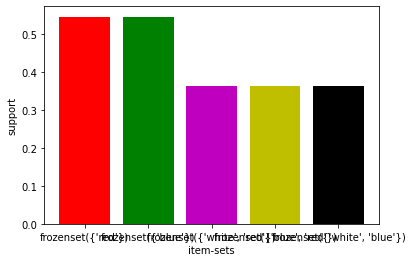

In [7]:
plt.bar(x = list(range(1,6)),height = frequent_itemsets.support[1:6],color='rgmyk')
plt.xticks(list(range(1,6)),frequent_itemsets.itemsets[1:6])
plt.xlabel('item-sets')
plt.ylabel('support')

In [8]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.shape

(18, 9)

In [9]:
rules.head(20)
rules.sort_values('lift',ascending = False,inplace=True)

In [10]:
#  To eliminate Redudancy in Rules

In [11]:
def to_list(i):
    return (sorted(list(i)))

In [12]:
ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)

In [13]:
ma_X = ma_X.apply(sorted)

In [14]:
rules_sets = list(ma_X)

In [15]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

In [16]:
# getting rules without any redudancy 

In [17]:
rules_no_redudancy  = rules.iloc[index_rules,:]

In [18]:
# Sorting them with respect to list and getting top 10 rules 

In [19]:
rules_no_redudancy.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
13,(red),"(green, white)",0.545455,0.090909,0.090909,0.166667,1.833333,0.041322,1.090909
6,(white),(orange),0.636364,0.181818,0.181818,0.285714,1.571429,0.066116,1.145455
16,(white),"(orange, red)",0.636364,0.090909,0.090909,0.142857,1.571429,0.033058,1.060606
3,(red),(blue),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
0,(white),(red),0.636364,0.545455,0.363636,0.571429,1.047619,0.016529,1.060606
4,(white),(blue),0.636364,0.545455,0.363636,0.571429,1.047619,0.016529,1.060606


In [20]:
# Perform algorithm for different support, connfidence value and max length

In [21]:
frequent_itemsets1 = apriori(phone, min_support=0.007, max_len=4,use_colnames = True)

In [22]:
# Most Frequent item sets based on support 

<ipython-input-23-6296cb9947a0>:2: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x = list(range(1,6)),height = frequent_itemsets1.support[1:6],color='rgmyk')


Text(0, 0.5, 'support')

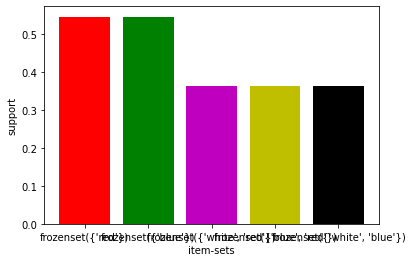

In [23]:
frequent_itemsets1.sort_values('support',ascending = False,inplace=True)
plt.bar(x = list(range(1,6)),height = frequent_itemsets1.support[1:6],color='rgmyk')
plt.xticks(list(range(1,6)),frequent_itemsets1.itemsets[1:6])
plt.xlabel('item-sets')
plt.ylabel('support')

In [24]:
rules1 = association_rules(frequent_itemsets1, metric="lift", min_threshold=1)
rules1.head(20)
rules1.sort_values('lift',ascending = False,inplace=True)

In [25]:
frequent_itemsets2 = apriori(phone, min_support=0.009, max_len=7,use_colnames = True)

In [26]:
# Most Frequent item sets based on support 

<ipython-input-27-5c5f88d162be>:2: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x = list(range(1,6)),height = frequent_itemsets2.support[1:6],color='rgmyk')


Text(0, 0.5, 'support')

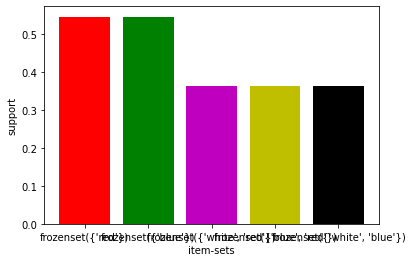

In [27]:
frequent_itemsets2.sort_values('support',ascending = False,inplace=True)
plt.bar(x = list(range(1,6)),height = frequent_itemsets2.support[1:6],color='rgmyk')
plt.xticks(list(range(1,6)),frequent_itemsets2.itemsets[1:6])
plt.xlabel('item-sets')
plt.ylabel('support')

In [28]:
rules2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=1)
rules2.head(20)
rules2.sort_values('lift',ascending = False,inplace=True)

#
#As min lenth value is changing the rules is changing.
#rules =18
#rules1=18
#rules2=18